In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import emcee
from scipy.optimize import minimize


#Declaration des Données
Rad= np.array([0.33,0.99, 1.98,2.64,3.63,7.59,12.50,17.48,22.46,27.44,32.32,37.30,42.28])#Kpc
Vobs=np.array([90.00,125.00,148.00,180.00,201.00,206.00,214.00,212.00,213.00,214.00,213.00,213.00,203.00])#Km/s
errV=np.array([20.00,15.00,15.00,17.00,15.00,10.00,5.00,5.00,2.00,2.00,2.00,3.00,3.00])#Km/s
Vgas=np.array([0.00,0.66,2.66,4.03,6.22,16.84,32.06,44.76,52.43,58.37,63.92,66.04,64.42])#Km/s
Vdisk=np.array([44.56,93.23,132.13,154.64,196.69,221.58,213.19,198.92,175.78,162.69,151.18,139.68,130.09])#Km/s
Vbul=np.zeros(13)#Km/s
SBdisk=np.array([2070.29,1190.44,888.44,784.11,702.55,192.87,56.10,17.41,10.54,5.26,2.50,0.96,0.33])#Lsun/pc²
SBbul=np.zeros(13)#Lsun/pc²


In [2]:
#Definition des constantes et des variables
rho_0=1.0 #Msun/Kpc^3
Rs0=1.0 #kpc
R0=np.linspace(0.001,20*Rs0,100, float) #kpc

------------------------------Courbe de rotation de NGC2998------------------------------

In [3]:
#Calcul de Vbar (km/s)
def Vb(Vgas, Vdisk):
    Vbar=np.zeros(13)
    for i in range(13):
        Vbar[i]=np.sqrt(np.power(Vgas[i], 2.00)+np.power(Vdisk[i],2.00)) 
    return Vbar #Km/s

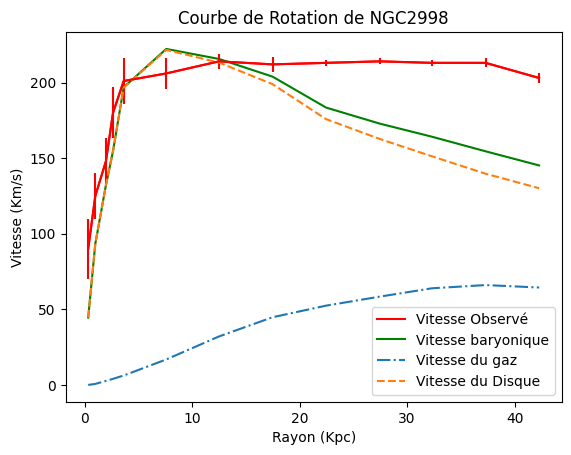

In [4]:
#Tracer des vitesses de rotation en fonction du rayon
plt.plot(Rad,Vobs, color='red')
plt.plot(Rad,Vb(Vgas,Vdisk),color='g')
plt.errorbar(Rad,Vobs,errV,color='r')
plt.plot(Rad,Vgas,linestyle = 'dashdot')
plt.plot(Rad,Vdisk, linestyle ='dashed')
plt.title("Courbe de Rotation de NGC2998")
plt.legend(["Vitesse Observé","Vitesse baryonique","Vitesse du gaz","Vitesse du Disque"],loc="lower right")
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Vitesse (Km/s)")
plt.show()

#Ici, il est clair que Vgas et Vdisk ne suffisent pas a expliquer l'écart entre Vobs et Vbar

------------------------------Etude de la Luminosité------------------------------

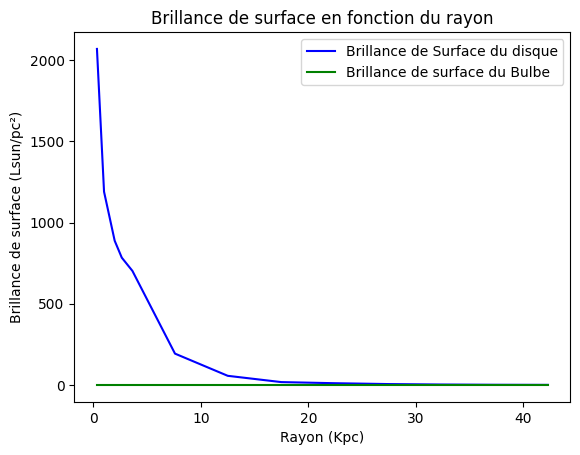

In [5]:
#Tracer de la brillance de surface en fonction du rayon

plt.plot(Rad,SBdisk, color='b')
plt.plot(Rad,SBbul, color='green')
plt.legend(["Brillance de Surface du disque","Brillance de surface du Bulbe"],loc="upper right")
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Brillance de surface (Lsun/pc²)")
plt.title("Brillance de surface en fonction du rayon")
plt.show()
#La Brillance de surface du disque semble suivre une exponentielle decroissante

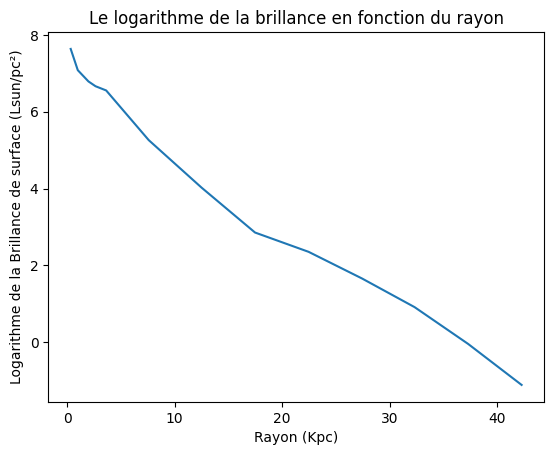

S0=  1199.234006056339 Lsun/pc2  R_0=  5.033712543191046 Kpc  et donc S(R)= 1199.234006056339 Exp(- 0.19866052966267816 R)


In [6]:
#En prenant ln(S(R))=-R/R0+lnS0=ax+b, il devient facile de trouver R0 et S0. On se retrouve avec une fonction linéaire
LogSBd=np.zeros(13)
for i in range(13):
    LogSBd[i]=np.log(SBdisk[i])
plt.plot(Rad,LogSBd)
plt.title("Le logarithme de la brillance en fonction du rayon")
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Logarithme de la Brillance de surface (Lsun/pc²)")
Coeff=np.polyfit(Rad, LogSBd, 1)
plt.show()
S0=np.exp(Coeff[1])
R_0=-1.00/(Coeff[0])
print("S0= ",S0,"Lsun/pc2  R_0= ", R_0,"Kpc  et donc S(R)=",S0,"Exp(-",1/R_0,"R)")

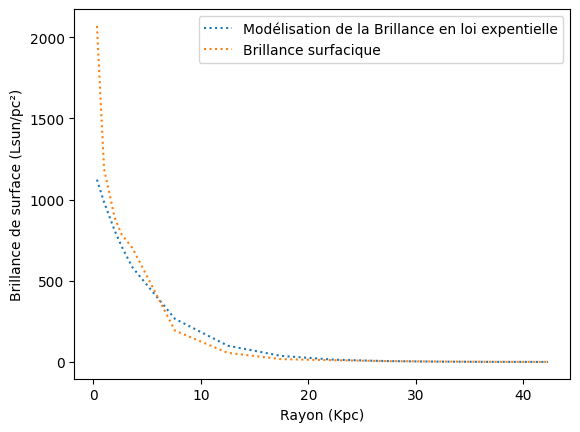

In [7]:
#Tracer S(R)=S0exp(-R/R0) et  SBdisk

S=np.zeros(13)

for i in range(13):
    S[i]=S0*np.exp((-1/R_0)*Rad[i])
plt.plot(Rad,S, linestyle="dotted")
plt.plot(Rad,SBdisk, linestyle="dotted")
plt.legend(["Modélisation de la Brillance en loi expentielle", "Brillance surfacique"], loc="upper right")
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Brillance de surface (Lsun/pc²)")
plt.show()


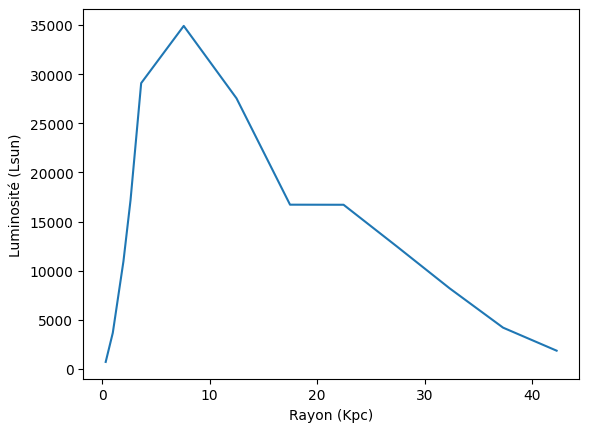

In [8]:
#A présent on assimile cette galaxie a un disque
#On peut donc calculer la luminosité
Ldisk=np.zeros(13)
for i in range(13):
    Ldisk[i]=SBdisk[i]*(np.pi*np.power(Rad[i],2))
plt.plot(Rad,Ldisk)
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Luminosité (Lsun)")
#plt.title("Luminosité en fonction de la distance au centre de la galaxie")
plt.show()

In [9]:
#On convertit Vdisk en Mdisk et on trace le profil de la masse en fonction du rayon
def Masse_disk(Vdisk):
    Mdisk=np.zeros(13)
    Vconv=1.022*10**-3
    G=4.5*10**-39
    for i in range(13):
        Mdisk[i]=((Vconv*Vdisk[i])**2)*Rad[i]/G
    
    return Mdisk
    

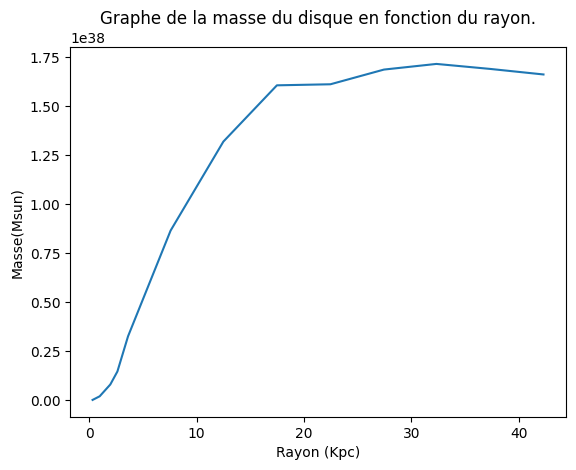

In [10]:
plt.plot(Rad,Masse_disk(Vdisk))
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Masse(Msun)")
plt.title("Graphe de la masse du disque en fonction du rayon.")
plt.show()

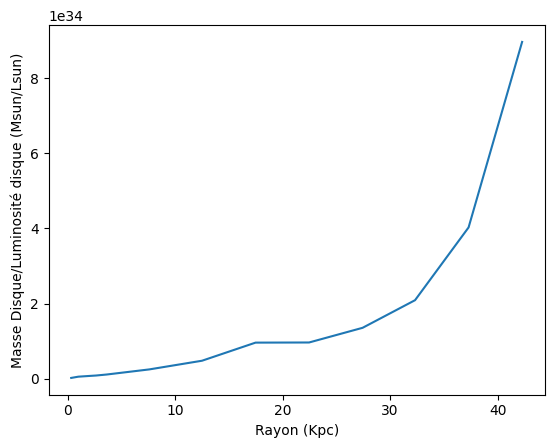

In [11]:
#Rapport masse/luminosité
ML=np.zeros(13)
for i in range(13):
    ML[i]=Masse_disk(Vdisk)[i]/Ldisk[i]
plt.plot(Rad,ML)
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Masse Disque/Luminosité disque (Msun/Lsun)")
#plt.title("Graphe de la masse du disque sur la luminosité du disque en fonction du rayon")
plt.show()

------------------------------Premier tracer d'un profil NFW quelconque ------------------------------

In [12]:
#Densité critique de l'univers
Dcrit1=(3*(2.26*10**-18)**2)/(8*np.pi*6.674*10**-11)
Dcrit2=Dcrit1*((3.089*10**19)**3)/(1.9891*10**30)
print("La densité critique de l'univers est: ",Dcrit1,"Kg/m^3 et ",Dcrit2,"Msun/Kpc^3")


La densité critique de l'univers est:  9.135074026103139e-27 Kg/m^3 et  135.36586990385527 Msun/Kpc^3


In [13]:
#Calcul du profil de densité des halos de matiére noire, NFW
def densite(rho_0,Rs,R):

    dens=np.zeros(len(R))
    for i in range(len(R)):
        dens[i]=rho_0/((R[i]/Rs)*(1+R[i]/Rs)**2)
    return dens #Msun/kpc

In [14]:
#Calcul du profil de masse associé (Msun)
def Masse(rho_0,Rs,R):
    Masse=np.zeros(len(R))
    for i in range(len(R)):
        Masse[i]=4*np.pi*rho_0*Rs**3*(np.log((Rs+R[i])/Rs)-R[i]/(Rs+R[i]))
    return Masse #Msun


In [15]:
#Calcul du rayon de viriel, avec c=R200/Rs=10
M200=10**12 #Msun
R200_c10=np.power((3*M200)/(np.pi*800*Dcrit2),1/3) #kpc
print("Le rayon de viriel est: ",R200_c10,"Kpc")

Le rayon de viriel est:  206.59702918057965 Kpc


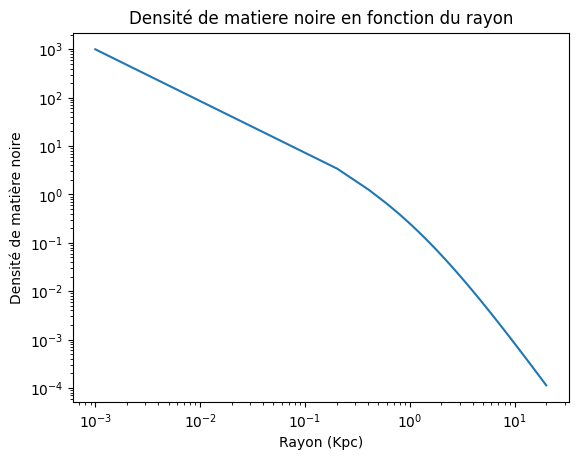

In [16]:
#Tracer de la densité de matière noir pour ce faire une idée du profil
rho_0=1.0 #Msun/Kpc^3
Rs0=1.0 #kpc

R0=np.linspace(0.001,20*Rs0,100, float) #kpc



plt.plot(R0,densite(rho_0,Rs0,R0))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Densité de matière noire")
plt.title("Densité de matiere noire en fonction du rayon")
plt.show()

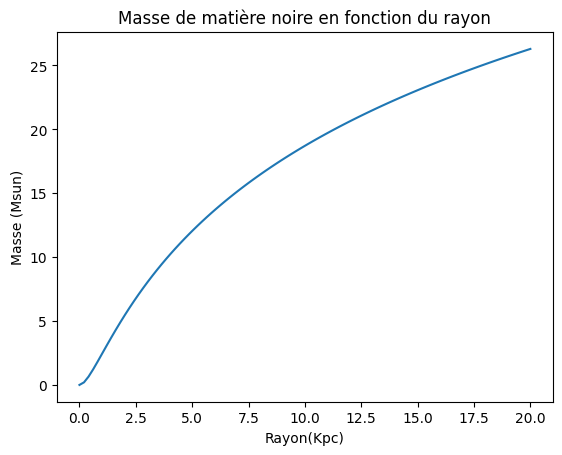

In [17]:
#Tracer de la masse de matière noire en fonction du rayon

plt.plot(R0,Masse(rho_0,Rs0,R0))

plt.xlabel("Rayon(Kpc)")
plt.ylabel("Masse (Msun)")
plt.title("Masse de matière noire en fonction du rayon")
plt.show()

In [23]:

def B95(rho_0,Rs_c10,R):
    dens=np.zeros(len(R))
    for i in range(len(R)):
        dens[i]=rho_0/((R[i]/Rs_c10+1)*(1+(R[i]/Rs_c10)**2))
    return dens #Msun/kpc

 Tracer rho(r) et M(r) pour un halo NFW de paramètres Mvir = 10^12 Msun et c=10. 

Le rayon d'échelle de notre galaxie est:  20.659702918057967 Kpc


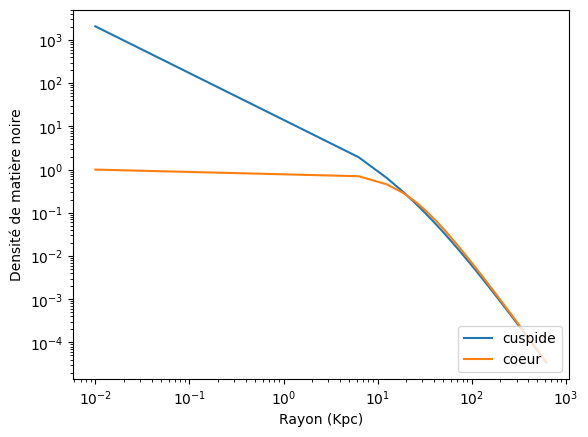

In [24]:
#Tracer de la densité de matiere noir ( normalisé par rho_0) avec la nouvelle valeur de Rs pour c=10
Rs_c10=R200_c10/10 #kpc

R=np.linspace(0.01,30*Rs_c10,100, float)#kpc

print("Le rayon d'échelle de notre galaxie est: ",Rs_c10,"Kpc")
plt.plot(R,densite(rho_0,Rs_c10,R))
plt.plot(R,B95(rho_0,Rs_c10,R))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Densité de matière noire")
#plt.title("Densité de matiere noire en fonction du rayon")
plt.legend(["cuspide","coeur"],loc="lower right")
plt.show()

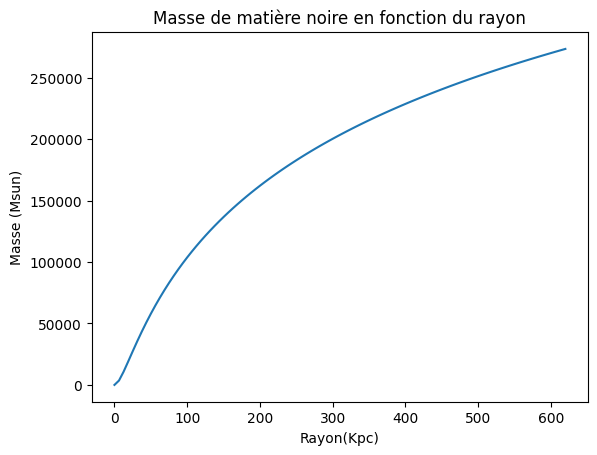

In [25]:
#Tracer de la masse de matiere noir avec la nouvelle valeur de Rs pour c=10
plt.plot(R,Masse(rho_0,Rs_c10,R))
plt.xlabel("Rayon(Kpc)")
plt.ylabel("Masse (Msun)")
plt.title("Masse de matière noire en fonction du rayon")
plt.show()

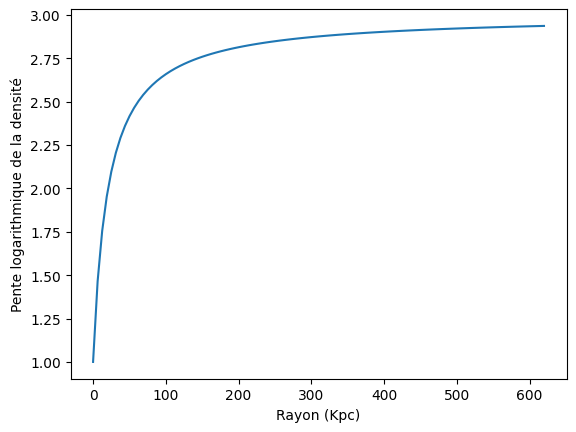

In [26]:
#Tracer la pente logarithmique S(r)=-dln(rho(r))/dln(r)
pente=np.zeros(100)
for i in range(100):
    pente[i]=1+((2*R[i])/(Rs_c10+R[i]))
    
plt.plot(R,pente)
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Pente logarithmique de la densité")
plt.show()


In [27]:
#Calcule Vhalo(r)
def Vhalo(M,R):
    Vhalo=np.zeros(len(R))
    G=0.06731*6.67*10**-11 #Kpc**3/Msun/Myr**2
    vconv=1.022*10**-3 # multiply by vconv to convert velocity from km/s to kpc/Myr 
    for i in range(len(R)):
        Vhalo[i]=np.sqrt(G*M[i]/R[i])/(vconv) #km/s
    return Vhalo 


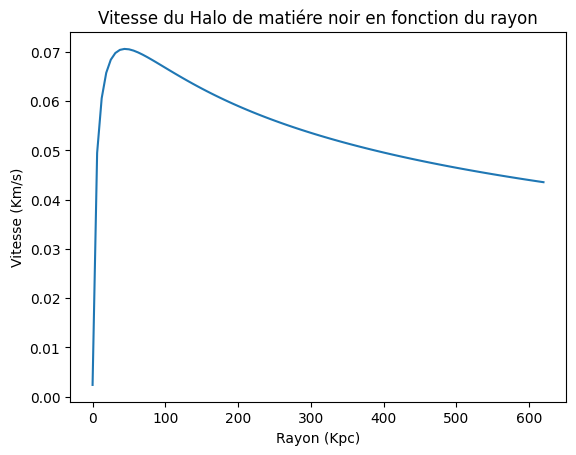

In [28]:
#Tracer Vhalo
plt.plot(R,Vhalo(Masse(rho_0,Rs_c10,R),R))
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Vitesse (Km/s)" )
plt.title("Vitesse du Halo de matiére noir en fonction du rayon")
plt.show()

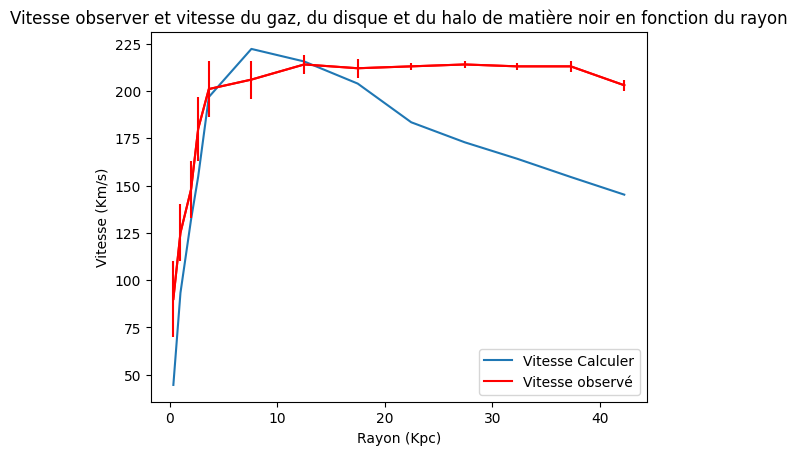

In [29]:
#Tracer de la sommes des vitesse du gaz, disque et du halo et comparons avec les vitesses obs
V_total=np.zeros(13)
for i in range(13):
    V_total[i]=np.sqrt(Vgas[i]**2+Vdisk[i]**2+Vhalo(Masse(rho_0,Rs_c10,Rad),Rad)[i]**2)
plt.plot(Rad,V_total)
plt.plot(Rad,Vobs,color='r')
plt.errorbar(Rad,Vobs,errV,color='r')
plt.title("Vitesse observer et vitesse du gaz, du disque et du halo de matière noir en fonction du rayon")
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Vitesse (Km/s)")
plt.legend(["Vitesse Calculer","Vitesse observé"],loc="lower right")
plt.show()
#Le halo, tel que définie, ne suffit pas a expliquer Vobs. Les parametre ne sont pas bons

In [30]:
def M(Mvir,c,R):
    R200=np.power((3*Mvir)/(np.pi*800*Dcrit2),1/3)#kpc
    Rs=R200/c #kpc
    Rho0=((Mvir)/(4*np.pi*(Rs**3)))*np.power(np.log(1+c)-(c/(1+c)),-1)
    Masse=np.zeros(len(R))#Msun
    for i in range(len(R)):
        Masse[i]=4*np.pi*Rho0*Rs**3*(np.log((Rs+R[i])/Rs)-R[i]/(Rs+R[i])) #Msun
    return Masse

Le rayon d'echelle d'une galaxie avec une masse de viriel Mvir= 5407475820000.0 Msun et une concentration c= 1.5  et Rs= 241.7488082540714 Kpc
La constante de normalisation Rho_0 devient:  96295.33103260753 Msun/kpc^3


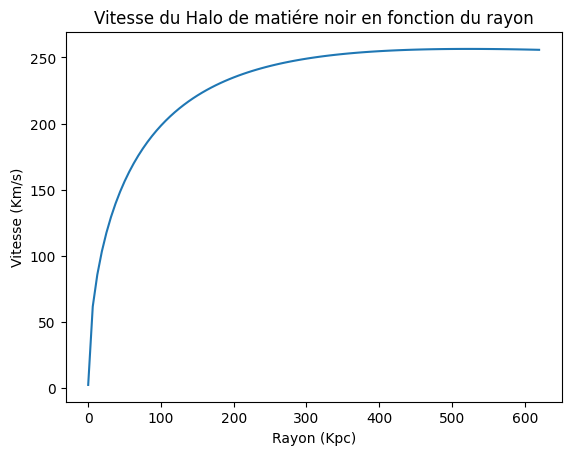

In [31]:
#Tracer de la vitesse du halo de matiere noir ( normalisé par Rho_0 qui depend de Mvir, Rs et c) avec la nouvelle valeur de Rs pour c M200 quelconque

c=1.5
Mvir=5.40747582e+12 #Msun


R200=np.power((3*Mvir)/(np.pi*800*Dcrit2),1/3) #kpc
Rs=R200/c #kpc
print("Le rayon d'echelle d'une galaxie avec une masse de viriel Mvir=",Mvir,"Msun et une concentration c=",c," et Rs=",Rs,"Kpc")
Rho0=((Mvir)/(4*np.pi*(Rs**3)))*np.power(np.log(1+c)-(c/(1+c)),-1) #Msun/kpc3
print("La constante de normalisation Rho_0 devient: ",Rho0,"Msun/kpc^3")
plt.plot(R,Vhalo(M(Mvir,c,R),R))
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Vitesse (Km/s)" )
plt.title("Vitesse du Halo de matiére noir en fonction du rayon")
plt.show()

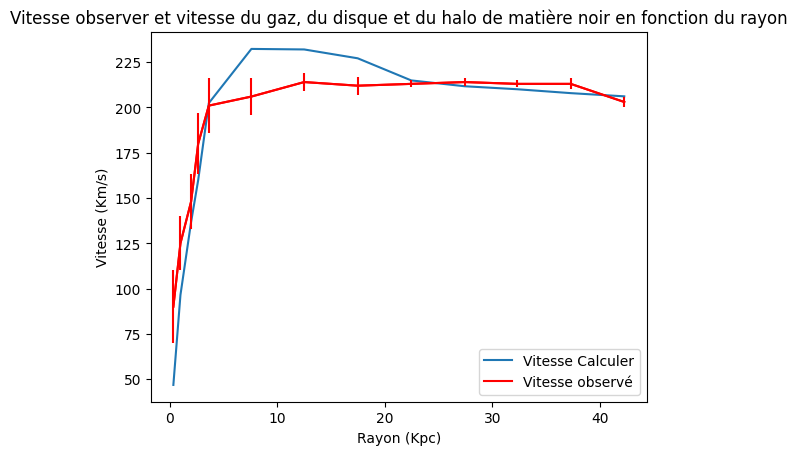

In [32]:
V_t=np.zeros(13)
M=M(Mvir,c,Rad)
for i in range(13):
    V_t[i]=np.sqrt(Vgas[i]**2+Vdisk[i]**2+Vhalo(M,Rad)[i]**2)
plt.plot(Rad,V_t)
plt.plot(Rad,Vobs,color='r')
plt.errorbar(Rad,Vobs,errV,color='r')
plt.title("Vitesse observer et vitesse du gaz, du disque et du halo de matière noir en fonction du rayon")
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Vitesse (Km/s)")
plt.legend(["Vitesse Calculer","Vitesse observé"],loc="lower right")
plt.show()


------------------------------Halo NFW avec Mvir, c et ML parametre libre------------------------------
But: determiner les meilleurs valeurs des parametres

In [33]:
#Faire un fit pour trouver les meilleurs valeurs des parametres c et Mvir avec la méthode des moindres carré on commence par creer une fonction fvhal qui est fonction des parametre c et Mvir
def fvhal(Ray, Mvir200, c): #Vitesse du halo
    rhocrit=135.36586990385527
    Rs=(np.power((3*Mvir200)/(np.pi*800*rhocrit),1/3)/c)
    G=4.302e-6
    M=Mvir200*np.power(np.log(1+c)-c/(1+c),-1)*(np.log((Rs+Ray)/Rs)-Ray/(Rs+Ray))
    return np.sqrt(G*M/Ray)
    


In [34]:
def Vtot(Ray, logMvir, logc, logML):# ML correspond au rapport masse luminosité, permet de preciser l'equation. Au debut nous l'avions supposée etre =1
    Mvir=10**logMvir
    c=10**logc
    ML=10**logML
    return np.sqrt(fvhal(Ray,Mvir,c)**2+(Vgas)**2+ML*(Vdisk)**2)

Les valeur Optimisé sont Mvir= 12.051036769314566 Msun    c= 7.163142029361114     et ML=  0.6480572599585998 Msun/Lsun  Avec des erreurs de  [0.13071773 0.18984936 0.08596192]


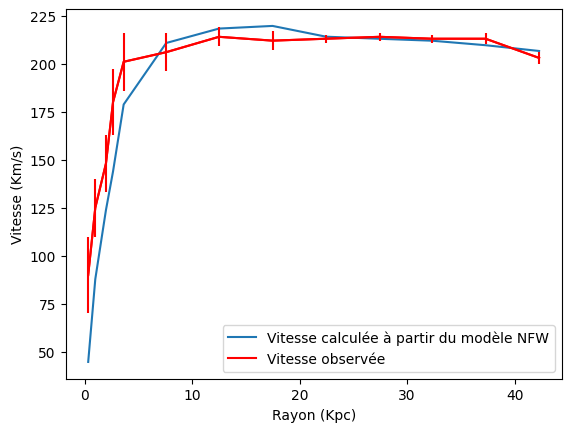

In [35]:
#Faire un fit pour trouver les meilleurs valeurs des parametres c et Mvir avec la méthode des moindres carrés
liminf=np.array([8,0,-1])
limsup=np.array([18,2,1])
popt, pcov=curve_fit(Vtot,Rad,Vobs,bounds=(liminf, limsup),p0=[12,1,0], sigma=errV, absolute_sigma=True)
perr= np.sqrt(np.diag(pcov))
print("Les valeur Optimisé sont Mvir=",popt[0],"Msun    c=",10**popt[1],"    et ML= ", 10**popt[2],"Msun/Lsun  Avec des erreurs de ", perr)

plt.plot(Rad,Vtot(Rad,*popt))
plt.plot(Rad,Vobs,color='r')
plt.errorbar(Rad,Vobs,errV,color='r')
#plt.title("Vitesse observé et vitesse calculé à partire du modèle NFW en fonction du rayon")
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Vitesse (Km/s)")
plt.legend(["Vitesse calculée à partir du modèle NFW","Vitesse observée"],loc="lower right")
plt.show()

#On remarque que le fit n'est pas terrible au debut, c'est a cause du profil NFW qui suppose une non flexibilité de la forme du halo de matiere noire

100%|██████████| 30000/30000 [01:17<00:00, 388.35it/s]


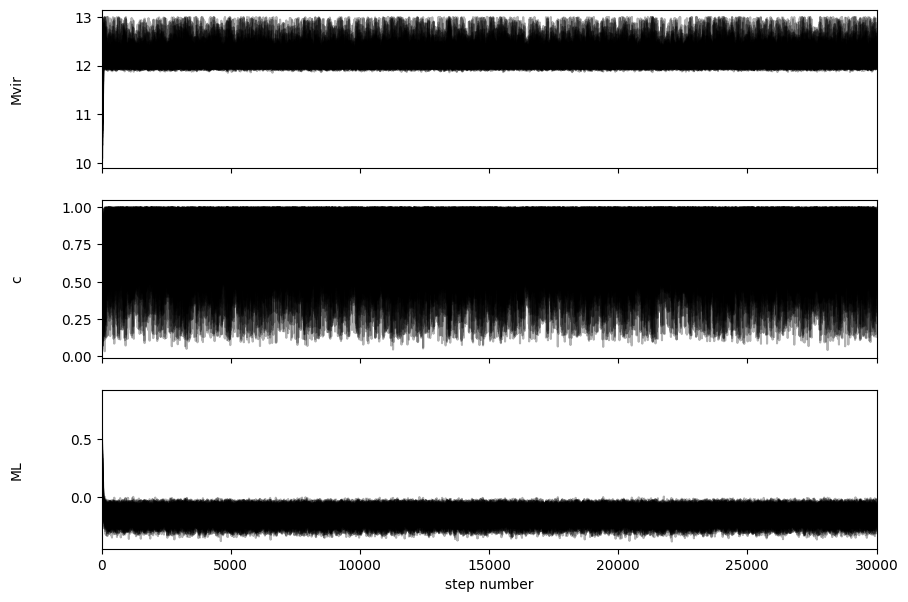

In [36]:
#A present on essaie de refaire un fit en utilisant la statistique bayesienne, on suppose que nos erreur sont gaussienne et independante

def log_likelihood(theta, Rad, Vobs, errV):
    Mvir, c, ML=theta
    Vtot_values=Vtot(Rad, *theta)
    sigma2 = errV**2
    likelihood = -0.5 * np.sum(((Vobs - Vtot_values) ** 2 )/ sigma2 )
    return likelihood

def log_prior(theta):
    Mvir, c , ML = theta
    if 10 <= Mvir <= 13 and 0 <= c <= 1 and -0.5 <= ML < 1.0:
        return 0.0
    return -np.inf

def log_probability(theta, Rad, Vobs, errV):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, Rad, Vobs, errV)


initial = np.array([11,0.7,0.6])

nwalkers=50
ndim=3
step=30000
pos = initial + 0.1 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(Rad, Vobs, errV))
sampler.run_mcmc(pos, step, progress=True)



fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["Mvir", "c", "ML"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")
plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

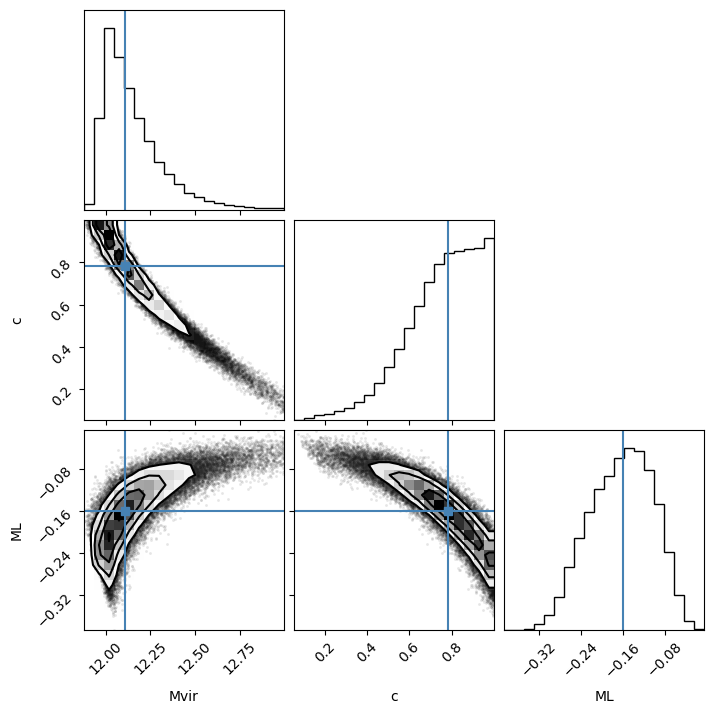

In [37]:
import corner

flat_samples = sampler.get_chain(discard=9000, thin=15, flat=True)

from IPython.display import display, Math
parameters=np.zeros(3)

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    parameters[i]=mcmc[1]
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(10**mcmc[1], 10**q[0], 10**q[1], labels[i])
    display(Math(txt))
    



fig = corner.corner(flat_samples, labels=labels,truths=parameters);


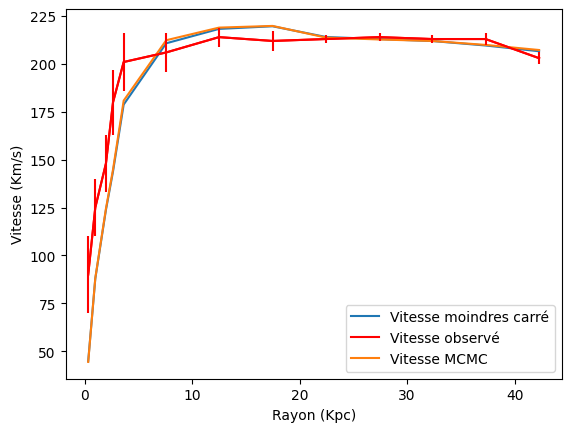

In [38]:
plt.plot(Rad,Vtot(Rad,*popt))
plt.plot(Rad,Vobs,color='r')
plt.plot(Rad,Vtot(Rad,*parameters))
plt.errorbar(Rad,Vobs,errV,color='r')
#plt.title("Vitesse observer et vitesse du gaz, du disque et du halo de matière noir en fonction du rayon")
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Vitesse (Km/s)")
plt.legend(["Vitesse moindres carré","Vitesse observé","Vitesse MCMC"],loc="lower right")
plt.show()


------------------------------Halo Burkert 95+ avec Mvir, c et ML parametre libre------------------------------

Les valeur Optimisé sont Mvir= 10.929472067159908 Msun    c= 3.9626186505658905     et ML=  0.8714757711534398 Msun/Lsun  Avec des erreurs de  [0.11611657 0.04651152 0.02959269]  pour le modéle Burkert 95


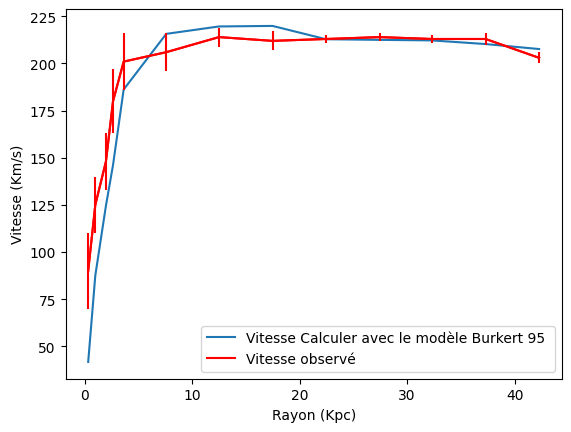

In [39]:
#Essayons un autre modele (Burkert 95) dit de coeur pour voir si le fit est meilleur pour r petit
from scipy.integrate import quad

def Mass(Ray, Mvir200, c, D0):
    rhocrit=135.36586990385527
    Rs=(np.power((3*Mvir200)/(np.pi*800*rhocrit),1/3)/c)
    return (4*np.pi*Ray*Ray*D0)/((1+(Ray/Rs))*(1+(Ray/Rs)**2))#Msun

def integrate_mass(Ray, Mvir200, c, D0, limit):
    result, _ = quad(lambda r: Mass(r, Mvir200, c, D0), 0, limit)
    return result #Msun

def fvhal_B(Ray, Mvir200, c):
    rhocrit=135.36586990385527 #Msun/kpc3
    Rs=(np.power((3*Mvir200)/(np.pi*800*rhocrit),1/3)/c)
    G=4.302e-6#km3*s-2*Msun-1
    density_0 = Mvir200 / (integrate_mass(Ray, Mvir200, c, 1, Rs))
    M = integrate_mass(Ray, Mvir200, c, density_0, Ray)
    return np.sqrt(G*M/Ray)#km/s

def Vtot_B(Ray, logMvir, logc, logML):# ML correspond au rapport masse luminosité, permet de preciser l'equation. Au debut nous l'avions supposée etre =1
    Mvir=10**logMvir
    c=10**logc
    ML=10**logML
    return np.sqrt(np.array([fvhal_B(r, Mvir, c)**2 for r in Ray]) + Vgas**2 + ML * Vdisk**2)#km/s

liminf=np.array([8,0,-1])
limsup=np.array([18,2,1])
popt2, pcov2=curve_fit(Vtot_B,Rad,Vobs,bounds=(liminf, limsup),p0=[12,1,0.1], sigma=errV, absolute_sigma=True)
perr2= np.sqrt(np.diag(pcov2))
print("Les valeur Optimisé sont Mvir=",popt2[0],"Msun    c=",10**popt2[1],"    et ML= ", 10**popt2[2],"Msun/Lsun  Avec des erreurs de ", perr2," pour le modéle Burkert 95")

plt.plot(Rad,Vtot_B(Rad,*popt2))

plt.plot(Rad,Vobs,color='r')
plt.errorbar(Rad,Vobs,errV,color='r')
#plt.title("Vitesse observer et vitesse calculer à partir du modéle de Burkert 95")
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Vitesse (Km/s)")
plt.legend(["Vitesse Calculer avec le modèle Burkert 95 ","Vitesse observé"],loc="lower right")
plt.show()

#Avec un modele dit de coeur on aurai voulu un meilleur fit a petit r, le changement n'est pas dingo

100%|██████████| 10000/10000 [11:13<00:00, 14.84it/s]


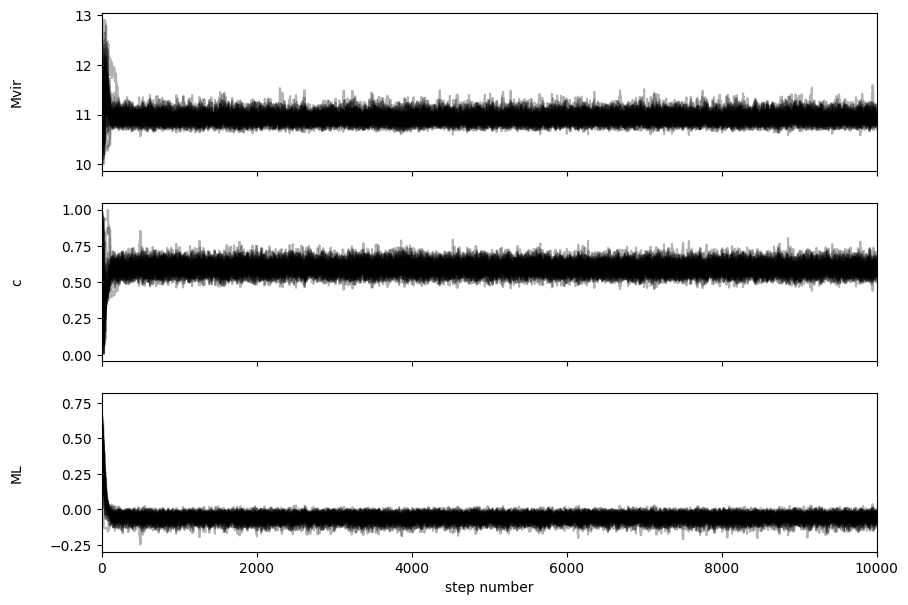

(9990, 3)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[10.93238512  0.59670463 -0.05899991]


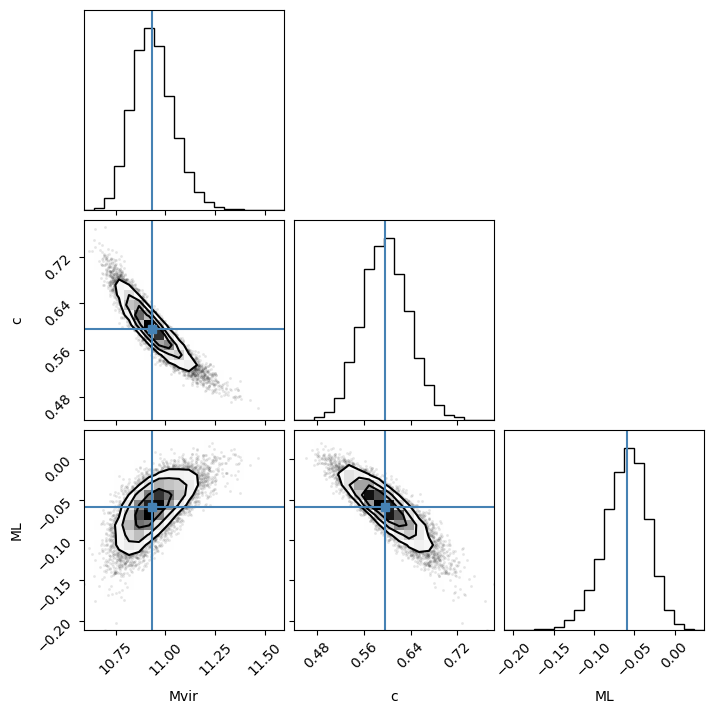

In [40]:
#A present on essaie de refaire un fit en utilisant la statistique bayesienne, on suppose que nos erreur sont gaussienne et independante pour comparer et voir si le fit est meilleur en estimant les parametres avec MCMC

def log_likelihood2(theta, Rad, Vobs, errV):
    Mvir, c, ML=theta
    Vtot_values=Vtot_B(Rad, *theta)
    sigma2 = errV**2
    likelihood = -0.5 * np.sum(((Vobs - Vtot_values) ** 2 )/ sigma2 )
    return likelihood

def log_prior2(theta):
    Mvir, c , ML = theta
    if 10 <= Mvir <= 13 and 0 <= c <= 1 and -0.5 <= ML < 1.0:
        return 0.0
    return -np.inf

def log_probability2(theta, Rad, Vobs, errV):
    lp = log_prior2(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood2(theta, Rad, Vobs, errV)


initial2 = np.array([11,0.7,0.6])

nwalkers2=30
ndim2=3
step2=10000
pos2 = initial2 + 0.1 * np.random.randn(nwalkers2, ndim2)

sampler2 = emcee.EnsembleSampler(nwalkers2, ndim2, log_probability2, args=(Rad, Vobs, errV))
sampler2.run_mcmc(pos2, step2, progress=True)


fig2, axes2 = plt.subplots(3, figsize=(10, 7), sharex=True)
samples2 = sampler2.get_chain()
for i in range(ndim2):
    ax2 = axes2[i]
    ax2.plot(samples2[:, :, i], "k", alpha=0.3)
    ax2.set_xlim(0, len(samples2))
    ax2.set_ylabel(labels[i])
    ax2.yaxis.set_label_coords(-0.1, 0.5)

axes2[-1].set_xlabel("step number")
plt.show()

flat_samples2 = sampler2.get_chain(discard=5000, thin=15, flat=True)

print(flat_samples2.shape)

parameters2=np.zeros(3)

for i in range(ndim2):
    mcmc2 = np.percentile(flat_samples2[:, i], [16, 50, 84])
    parameters2[i]=mcmc2[1]
    q2 = np.diff(mcmc2)
    txt2 = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt2 = txt2.format(10**mcmc2[1], 10**q2[0], 10**q2[1], labels[i])
    display(Math(txt2))

print(parameters2)

fig2 = corner.corner(flat_samples2, labels=labels,truths=parameters2);


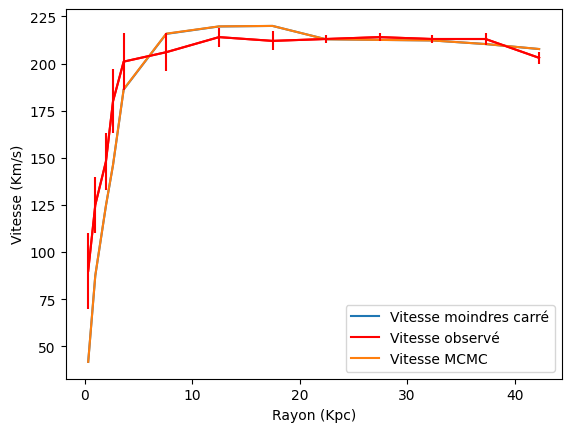

In [41]:
#Comparaison MCMC et Méthode des moindres carrés pour Burkert 95

plt.plot(Rad,Vtot_B(Rad,*popt2))
plt.plot(Rad,Vobs,color='r')
plt.plot(Rad,Vtot_B(Rad,*parameters2))
plt.errorbar(Rad,Vobs,errV,color='r')
#plt.title("Vitesse calculé avec Burkert 95 et Vitesse observé en fonction du rayon")
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Vitesse (Km/s)")
plt.legend(["Vitesse moindres carré","Vitesse observé","Vitesse MCMC"],loc="lower right")
plt.show()

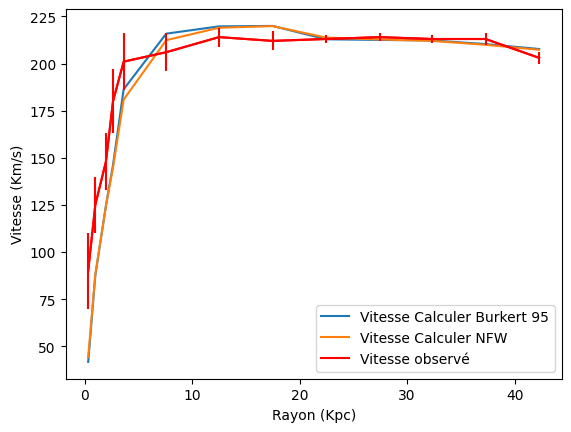

In [42]:
#On compare les fit burker et NFW avec les parametre MCMC

plt.plot(Rad,Vtot_B(Rad,*parameters2))
plt.plot(Rad,Vtot(Rad,*parameters))
plt.plot(Rad,Vobs,color='r')
plt.errorbar(Rad,Vobs,errV,color='r')
#plt.title("Vitesse observer et vitesse calculer avec MCMC à partir des differents modéles")
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Vitesse (Km/s)")
plt.legend(["Vitesse Calculer Burkert 95","Vitesse Calculer NFW","Vitesse observé"],loc="lower right")
plt.show()

------------------------------Halo Dekel-Zaho avec Mvir, ML, c2 et s1 parametre libre------------------------------

C:\Users\cassi\AppData\Local\Temp\ipykernel_7232\1607796451.py:14: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(lambda r: MassDZ(r, Mvir200, c2, s1), 0, limit)


Les valeur Optimisé de Mvir, de c2, de ML et de s1 sont  11.989609563336835   24.523308869704312   0.13096582360563 1.652135790049729  Avec des erreurs de  [0.10121934 0.21756767 0.87470662 0.02019006]  pour le modéle Dekel Zaho


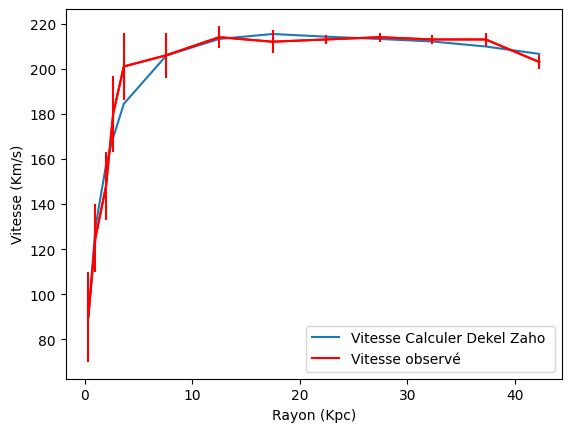

In [43]:
#A present nous allons tenter un dernier modele bien plus flexible le modele de Dekel-Zaho qui ajoute un parametre appele a

def MassDZ(Ray, Mvir200, c2, s1):
    a=(1.5*s1-2*(3.5-s1)*(0.01**0.5)*(c2**0.5))/(1.5-(3.5-s1)*(0.01**0.5)*(c2**0.5))
    c=(((2-a)/1.5)**2)*c2
    rhocrit=135.36586990385527
    Rs=(np.power((3*Mvir200)/(np.pi*800*rhocrit),1/3)/c)
    dens0=(c**(a-3))*(1-a/3)*((1+c**0.5)**(6-2*a))*((3*Mvir200)/(4*np.pi*(Rs**3)))
    dens=dens0/(((Ray/Rs)**a)*((1+(Ray/Rs)**0.5)**(7-2*a)))
    return 4*np.pi*Ray*Ray*dens #Msun


def integrate_massDZ(Ray, Mvir200, c2, s1, limit):
    result, _ = quad(lambda r: MassDZ(r, Mvir200, c2, s1), 0, limit)
    return result #Msun


def fvhal_DZ(Ray, Mvir200, c2, s1):
    G=4.302e-6 # km3*s-2*Msun-1
    M = integrate_massDZ(Ray, Mvir200, c2, s1, Ray)
    return np.sqrt(G*M/Ray) #km/s


def Vtot_DZ(Ray, logMvir, logc2, logML, logs1):# ML correspond au rapport masse luminosité, permet de preciser l'equation. Au debut nous l'avions supposée etre =1
    Mvir=10**logMvir
    c2=10**logc2
    ML=10**logML
    s1=10**logs1
    return np.sqrt(np.array([fvhal_DZ(r, Mvir, c2, s1)**2 for r in Ray]) + Vgas**2 + ML * Vdisk**2) #km/s


liminf3=np.array([8,0,-1,-100])
limsup3=np.array([18,3,1,100])
popt3, pcov3=curve_fit(Vtot_DZ,Rad,Vobs,bounds=(liminf3, limsup3),p0=[12,1,0.1,0], sigma=errV, absolute_sigma=True)
perr3= np.sqrt(np.diag(pcov3))
print("Les valeur Optimisé de Mvir, de c2, de ML et de s1 sont ",popt3[0]," ", 10**popt3[1]," ", 10**popt3[2], 10**popt3[3]," Avec des erreurs de ", perr3," pour le modéle Dekel Zaho")

plt.plot(Rad,Vtot_DZ(Rad,*popt3))

plt.plot(Rad,Vobs,color='r')
plt.errorbar(Rad,Vobs,errV,color='r')
#plt.title("Vitesse observer et vitesse calculer à partir du modéle de Dekel Zaho")
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Vitesse (Km/s)")
plt.legend(["Vitesse Calculer Dekel Zaho ","Vitesse observé"],loc="lower right")
plt.show()

------------------------------Graph de nos 3 modèles optimiser avec la méthode des moindres carrés------------------------------

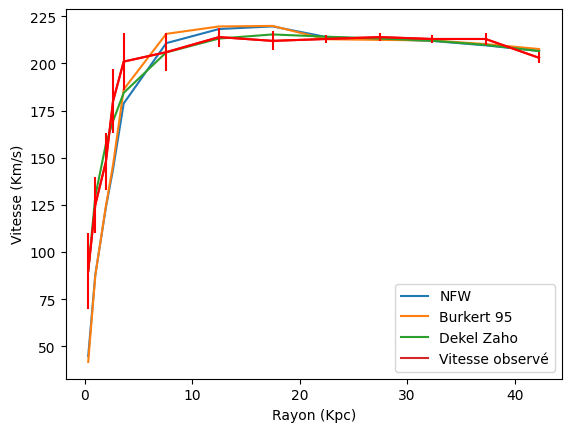

In [44]:
plt.plot(Rad,Vtot(Rad,*popt))
plt.plot(Rad,Vtot_B(Rad,*popt2))
plt.plot(Rad,Vtot_DZ(Rad,*popt3))
plt.plot(Rad,Vobs)
plt.errorbar(Rad,Vobs,errV,color='r')
plt.legend(["NFW","Burkert 95","Dekel Zaho","Vitesse observé"],loc="lower right")
#plt.title("Vitesse observer et vitesse calculer à partir de nos 3 modèles")
plt.xlabel("Rayon (Kpc)")
plt.ylabel("Vitesse (Km/s)")
plt.show()

------------------------------X² pour comparer les differents modeles------------------------------

In [45]:
#Calcul du X² reduit


def khi_2(dl,Vobs, Vtot):
    khi=0
    for i in range(len(Vobs)):
        khi+=((Vobs[i]-Vtot[i])**2)/Vtot[i]
    return khi/dl

print("La valeur du X² réduite pour le modéle de Burkert est ", khi_2(3,Vobs,Vtot_B(Rad,*parameters2)), "\nLa valeur du test du X² réduite pour le modéle NFW est ", khi_2(3,Vobs,Vtot(Rad,*parameters)),"\nLa valeur du X² réduite pour le modéle de Dekel-Zaho est ", khi_2(4,Vobs,Vtot_DZ(Rad,*popt3)))



La valeur du X² réduite pour le modéle de Burkert est  28.728721299558988 
La valeur du test du X² réduite pour le modéle NFW est  26.068526047601697 
La valeur du X² réduite pour le modéle de Dekel-Zaho est  0.7665636633301958
